In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

## 1. Data Random

Make the number from random generator function remain the same 

In [2]:
np.random.seed(0)

Make random cluster points
<br>
Note:
- X is two dimension array that contains coordinates each sample
- y is one dimension array that contains the label of each sample

In [3]:
X, y = make_blobs(n_samples=3000, centers=[[1, 0], [3, -2], [-2, -4], [-1, -2]], cluster_std=0.9)

Visualize the data from X:
<br>
Note:
- `X[:, 0]` means every x coordinate in X
- `Y[:, 1]` means every y coordinate in Y

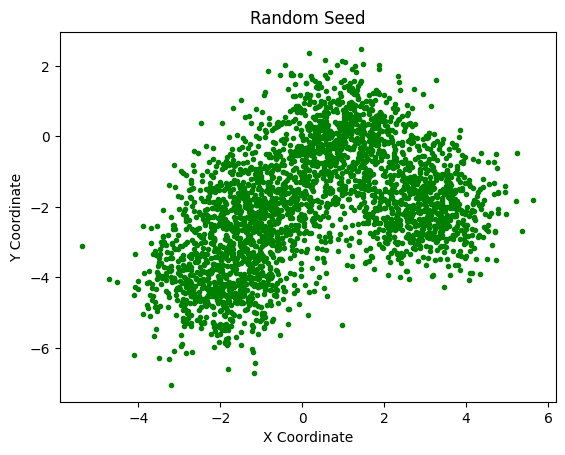

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.', color="green")
plt.title("Random Seed")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

### 2 Cluster

Setting K-Means for 2 clusters:
<br>
Note:
- `init='k-means++'` to initialize the center of cluster
- `n_init=12` means the number of the algorithm runs

In [5]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=12)

Fit the model with the data:

In [6]:
k_means.fit(X)

KMeans(n_clusters=2, n_init=12)

Get the label of each point:

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 1, 1, ..., 1, 0, 0])

Get the center of each cluster:

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.84674116, -1.03036113],
       [-1.64973585, -3.12078666]])

Visualize the data:

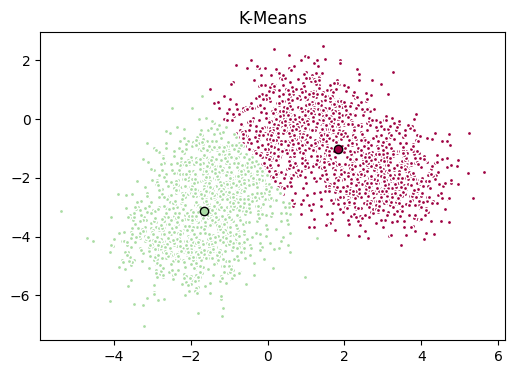

In [9]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 0.7, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[1, 0], [3, -2], [-2, -4], [-1, -2]])), colors):
    my_members = (k_means_labels == k)

    # Define the centroids
    cluster_center = k_means_cluster_centers[k]

    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('K-Means')

plt.show()

### 3 Clusters

Setting K-Means for 3 clusters:

In [10]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

Visualize the data:

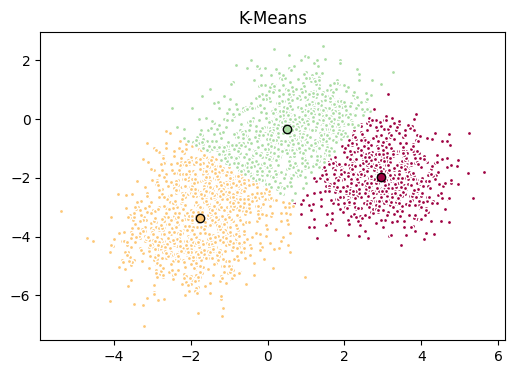

In [11]:
fig = plt.figure(figsize=(6, 4))

# Generate colors without including yellow
colors = plt.cm.Spectral(np.linspace(0, 0.7, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[1, 0], [3, -2], [-2, -4], [-1, -2]])), colors):
    my_members = (k_means_labels == k)

    # Define the centroids
    cluster_center = k_means_cluster_centers[k]

    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('K-Means')

plt.show()


## 2. Vehicle Sales Data

In [73]:
import pandas as pd

### Preprocessing Data:

In [74]:
cust_df = pd.read_csv("car_prices.csv")
cust_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


Drop all categorical atributs:

In [75]:
categorical_atribut = ['year','make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']
df = cust_df.drop(columns=categorical_atribut)
df.head()

,condition,odometer,mmr,sellingprice
0,5.0,16639.0,20500.0,21500.0
1,5.0,9393.0,20800.0,21500.0
2,45.0,1331.0,31900.0,30000.0
3,41.0,14282.0,27500.0,27750.0
4,43.0,2641.0,66000.0,67000.0


Normalize the data:

In [76]:
from sklearn.preprocessing import StandardScaler

X = df.values[:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.790537  , -0.96756958,  0.69538776,  0.80915522],
       [-1.790537  , -1.10325902,  0.72637855,  0.80915522],
       [ 1.071619  , -1.25422898,  1.87303778,  1.68098655],
       ...,
       [ 1.2862807 , -0.33234224,  1.65610225,  2.09126012],
       [ 0.5707417 , -0.96721378,  0.13755353, -0.25755606],
       [ 0.2845261 , -0.99811188,  1.63544173,  1.34251086]])

Modelling the data:

In [77]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 ... 2 2 2]


In [78]:
df["data_labels"] = labels
df.head(5)

,condition,odometer,mmr,sellingprice,data_labels
0,5.0,16639.0,20500.0,21500.0,2
1,5.0,9393.0,20800.0,21500.0,2
2,45.0,1331.0,31900.0,30000.0,2
3,41.0,14282.0,27500.0,27750.0,2
4,43.0,2641.0,66000.0,67000.0,2


In [79]:
df.groupby('data_labels').mean()

,condition,odometer,mmr,sellingprice
data_labels,,,,
0,27.875938,96430.222736,8715.241562,8560.725035
1,21.337521,174467.947075,3749.964371,3588.742139
2,33.860252,32269.107947,18395.974123,18236.455732


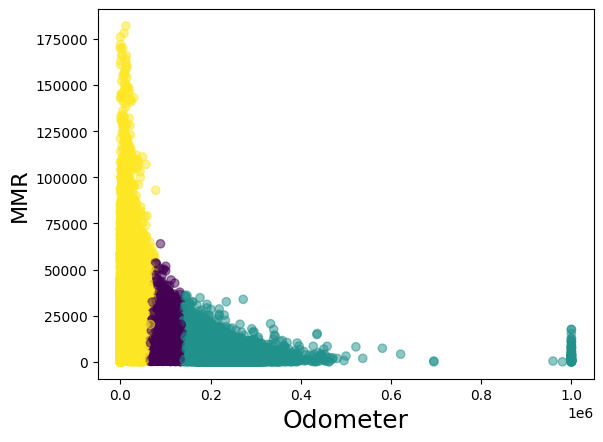

In [89]:
plt.scatter(X[:, 1], X[:, 2], c=labels.astype(np.float32), alpha=0.5)
plt.xlabel('Odometer', fontsize=18)
plt.ylabel('MMR', fontsize=16)

plt.show()

## Analisis:

Dilihat pada grafik yang menunjukkan MMR (Manheim Market Report) atau harga bekas pada sumbu Y dan Odometer (jarak tempuh mobil) pada sumbu X, apabila Odometer dari sebuah mobil semakin tinggi maka harga jualnya semakin kecil. 